In [1]:
import tensorflow as tf
#Say Thanks To https://github.com/Anupthor007

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime
import platform
import numpy as np
import pandas as pd

In [3]:
print("Python version:", platform.python_version())
print("Tensorflow version:", tf.__version__)
#print("Keras version:", ks.keras__version__)

Python version: 3.12.4
Tensorflow version: 2.18.0


In [4]:
#Load the TensorBoard notebook extnsion
#%reload_ext tensorboard
%load_ext tensorboard

In [5]:
%reload_ext tensorboard

In [6]:
!rm -rf ./.logs/

In [7]:
mnist_dataset=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist_dataset.load_data()

In [8]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [9]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

In [10]:
print("IMAGE_WIDTH:", IMAGE_WIDTH);
print("IMAGE_HEIGHT:", IMAGE_HEIGHT);
print("IMAGE_CHANNELS:", IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [11]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


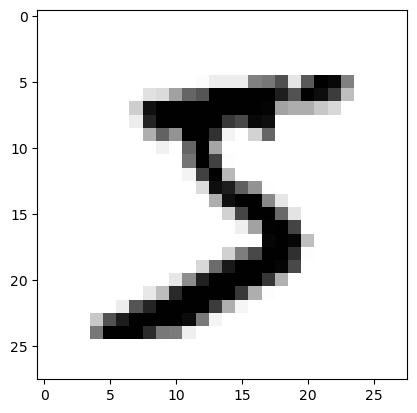

In [12]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

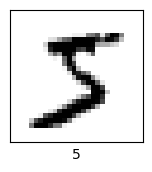

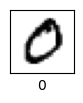

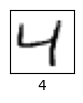

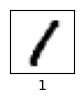

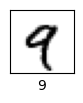

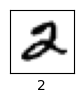

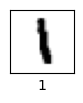

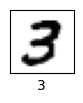

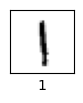

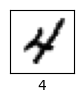

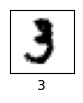

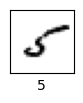

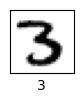

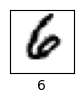

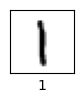

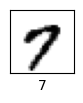

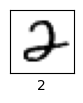

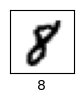

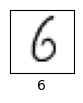

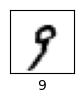

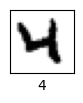

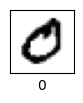

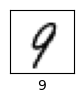

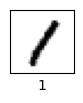

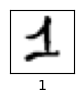

In [13]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
  plt.show()

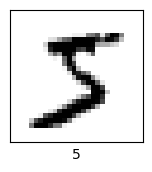

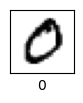

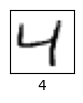

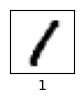

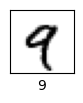

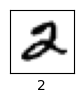

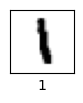

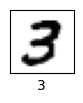

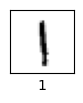

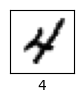

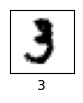

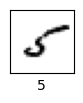

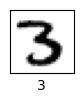

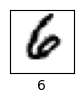

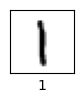

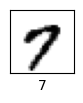

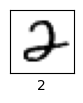

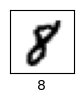

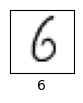

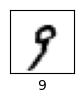

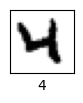

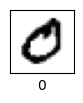

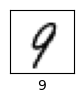

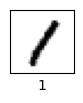

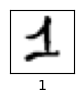

In [14]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
  plt.show()

In [15]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [16]:
print('x_train_with_chanels:',x_train_with_chanels.shape)
print('x_test_with_chanels:',x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [17]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [18]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
   input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
   kernel_size=5,
   filters=8,
   strides=1,
   activation=tf.keras.activations.relu,
   kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
kernel_size=5,
filters=16,
strides=1,
activation=tf.keras.activations.relu,
   kernel_initializer=tf.keras.initializers.VarianceScaling()
   ))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0,2))

model.add(tf.keras.layers.Dense(
              len(np.unique(y_train)),
              activation=tf.keras.activations.softmax,
              kernel_initializer=tf.keras.initializers.VarianceScaling()
               ))

model.summary()

C:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [22]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [23]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.8761 - loss: 0.4016 - val_accuracy: 0.9798 - val_loss: 0.0629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9762 - val_loss: 0.0713
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9848 - loss: 0.0475 - val_accuracy: 0.9884 - val_loss: 0.0353
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9874 - val_loss: 0.0392
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9913 - loss: 0.0261 - val_accuracy: 0.9883 - val_loss: 0.0353
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9906 - val_loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9952 -

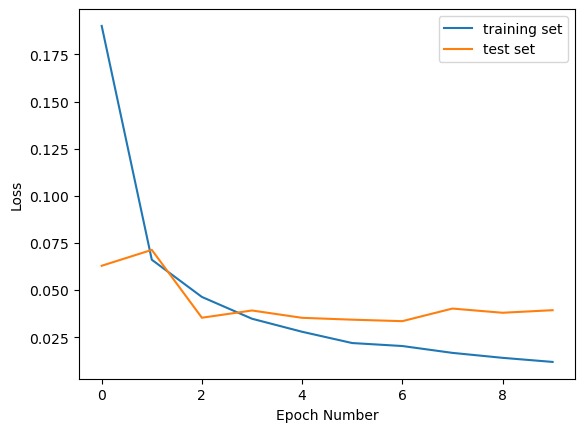

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

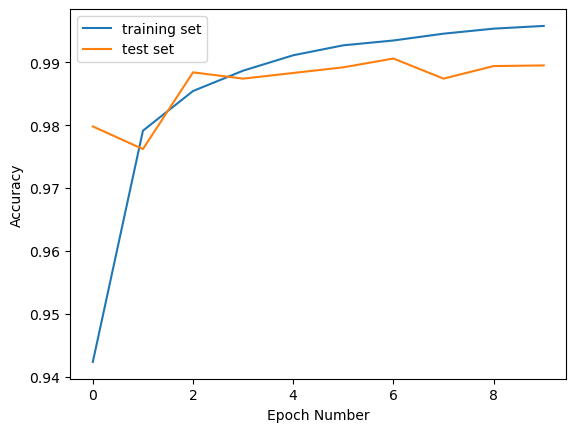

In [25]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [26]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [27]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.01037672720849514
Training accuracy:  0.996833324432373


In [28]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [29]:
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

Validation loss: 0.039322227239608765
Validation accuracy: 0.9894999861717224


In [37]:
model_name = 'digits_recognition_cnn.keras'
model.save(model_name)


In [40]:
loaded_model = tf.keras.models.load_model(model_name)

In [41]:
predictions_one_hot= loaded_model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [43]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [34]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.546273e-13,4.309260e-11,4.208549e-13,9.369619e-06,9.848214e-09,2.510694e-11,8.901428e-17,9.999906e-01,3.820293e-14,3.334182e-08
1,1.872580e-08,1.977502e-13,1.000000e+00,8.729179e-16,1.678450e-17,3.587693e-20,2.104770e-14,1.084968e-15,6.470071e-16,1.276365e-19
2,1.258372e-07,9.999840e-01,8.861715e-07,2.898414e-13,8.535864e-06,5.747935e-07,1.177415e-06,9.698689e-08,4.532840e-06,1.235962e-09
3,1.000000e+00,2.071936e-18,4.434933e-13,3.445781e-18,1.865166e-12,2.759756e-12,4.576598e-08,1.171539e-13,1.627421e-13,1.761005e-13
4,4.446915e-15,1.466003e-11,2.542736e-12,2.891191e-15,1.000000e+00,4.710142e-13,1.237203e-13,2.245700e-11,5.292160e-13,1.194304e-10
...,...,...,...,...,...,...,...,...,...,...
9995,2.053488e-15,3.044474e-13,1.000000e+00,3.674683e-13,2.810730e-21,6.107763e-27,2.606848e-22,1.825923e-10,1.582790e-18,6.356947e-23
9996,6.026607e-11,1.021474e-09,2.346849e-09,9.999994e-01,9.371859e-13,5.520751e-07,8.825647e-14,1.187243e-11,1.617496e-09,4.372845e-11
9997,3.304057e-17,8.190274e-11,5.253352e-16,4.170843e-18,1.000000e+00,2.172133e-14,2.742046e-13,1.242287e-13,3.175145e-12,8.976459e-14
9998,3.020161e-08,1.455073e-17,1.098240e-14,5.567861e-10,1.591850e-16,9.999999e-01,1.990551e-08,8.481208e-20,4.484980e-08,9.183655e-13


In [35]:
predictions= np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


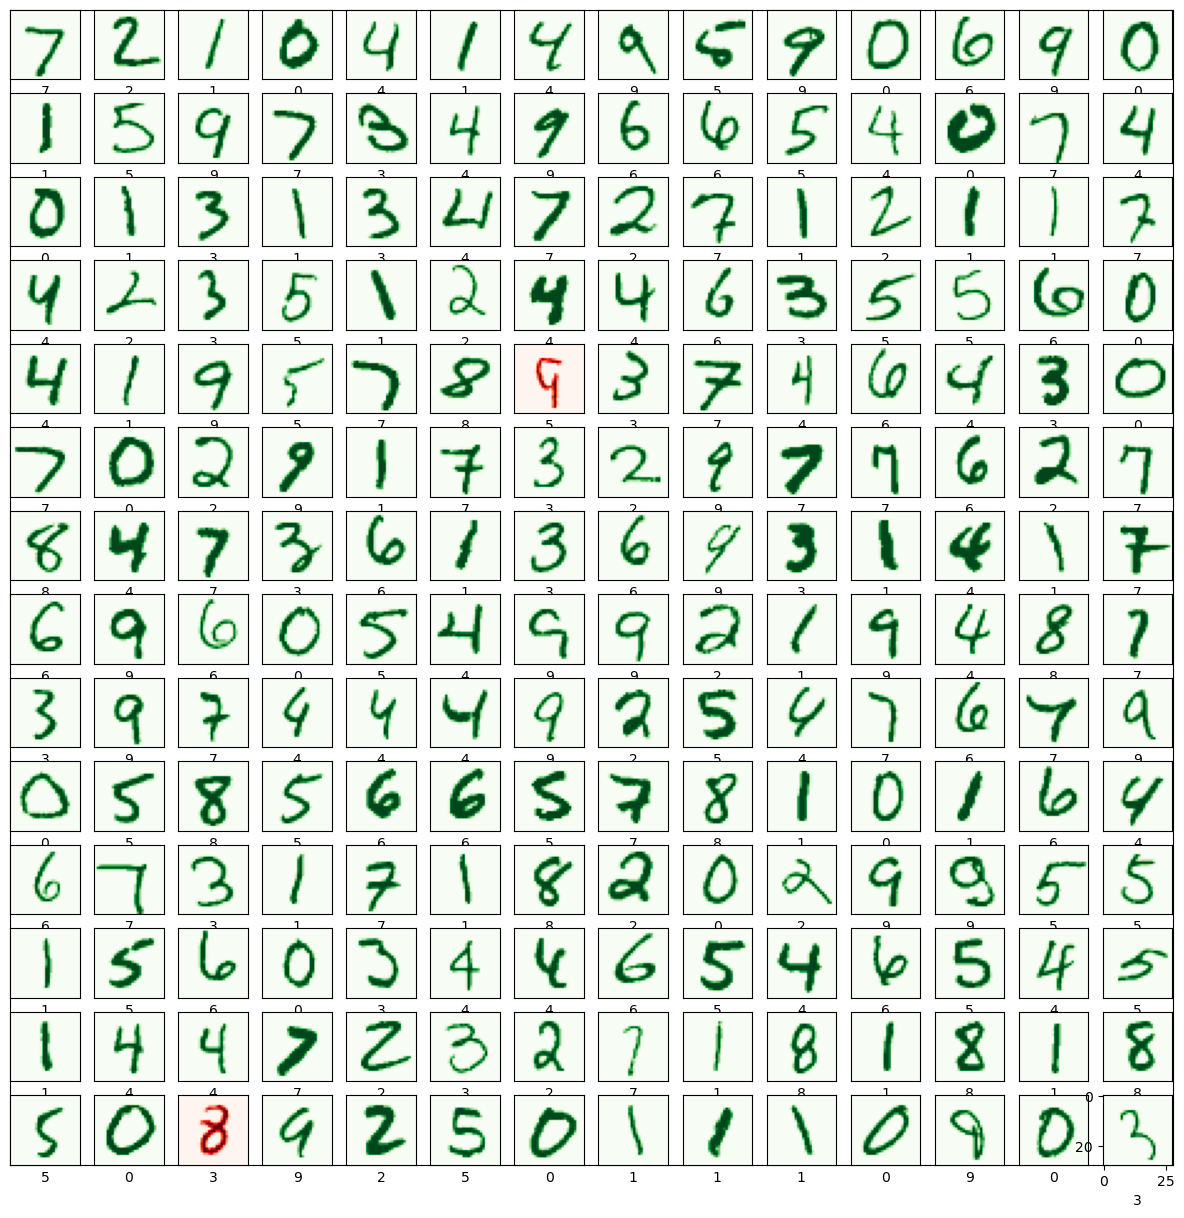

In [36]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()